In [135]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [136]:
data=pd.read_csv('training_data.csv',delimiter=':')
data.head()

,x,x2,y
0,-0.228788,-2.287877,3.506056
1,-0.094669,-0.946690,0.782723
2,-0.956651,-9.566513,3.045309
3,-1.984509,-19.845088,3.063300
4,0.386115,3.861152,5.548161


In [137]:
data.describe()

,x,x2,y
count,998.000000,998.000000,998.000000
mean,3.496300,34.963000,5.641535
std,3.270797,32.707971,2.696431
min,-3.444108,-34.441079,-0.075518
25%,0.118074,1.180740,3.432217
50%,4.011380,40.113800,5.081093
75%,6.306373,63.063733,8.294083
max,9.846538,98.465379,11.521694


In [138]:
data=data.fillna(np.mean(data))

In [139]:
data.drop('x2', axis=1, inplace=True)

In [140]:
data.head()

,x,y
0,-0.228788,3.506056
1,-0.094669,0.782723
2,-0.956651,3.045309
3,-1.984509,3.063300
4,0.386115,5.548161


In [141]:
def perform_clustering(df):

    # Prepare the features
    X = df[['x']]

    # Determine the best value of K using the elbow method
    distortions = []
    K = range(1, 10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(X)
        distortions.append(kmeanModel.inertia_)

    plt.figure(figsize=(16, 8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

    # Ask the user to input the optimal number of clusters based on the plot
    k = int(input("Enter the optimal number of clusters (K): "))

    # Perform K-Means clustering with the optimal number of clusters
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)

    # Add the cluster labels to the DataFrame
    df['Cluster'] = kmeanModel.labels_


    return df, k

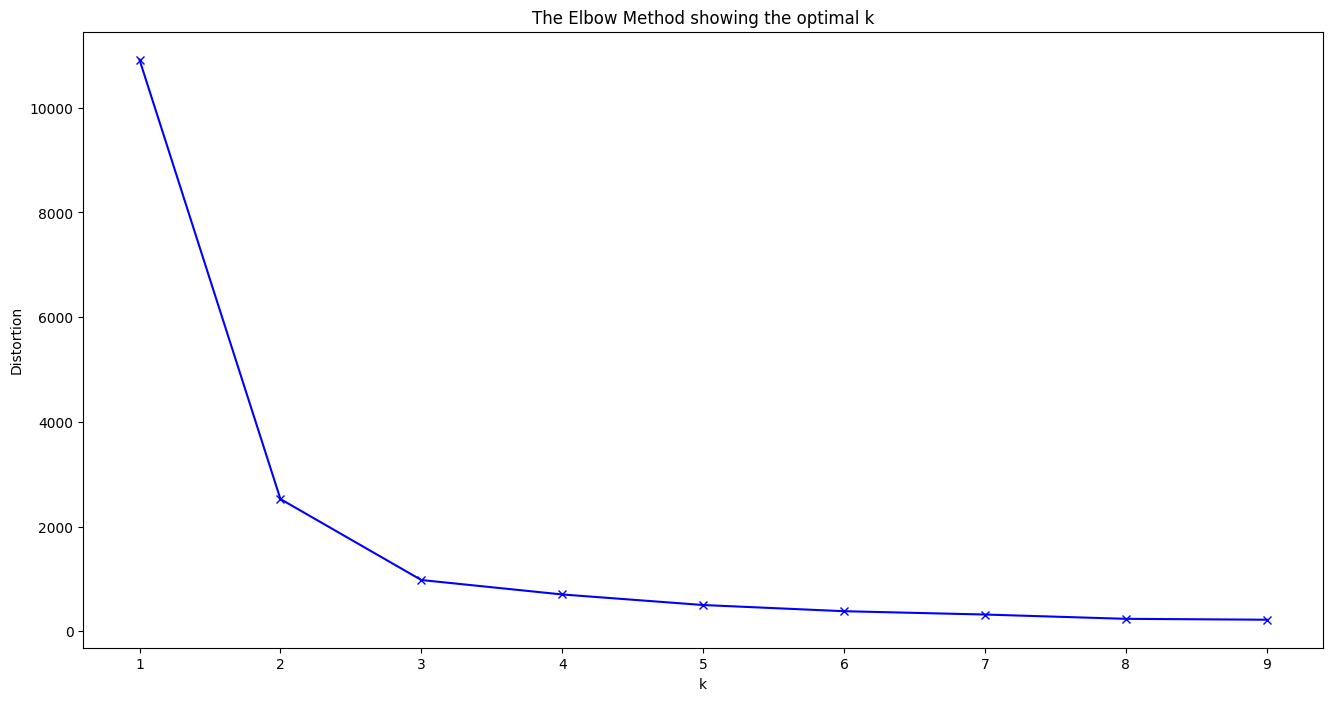

            x          y  Cluster
0   -0.228788   3.506056        0
1   -0.094669   0.782723        0
2   -0.956651   3.045309        0
3   -1.984509   3.063300        0
4    0.386115   5.548161        0
..        ...        ...      ...
995  6.090780   6.994628        1
996  6.404440  10.341862        1
997  6.759155   8.604072        1
998  7.696100   9.130374        1
999  7.035916   7.827138        1

[1000 rows x 3 columns] 3


In [142]:
df,k=perform_clustering(data)
print(df,k)

In [143]:
df

,x,y,Cluster
0,-0.228788,3.506056,0
1,-0.094669,0.782723,0
2,-0.956651,3.045309,0
3,-1.984509,3.063300,0
4,0.386115,5.548161,0
...,...,...,...
995,6.090780,6.994628,1
996,6.404440,10.341862,1
997,6.759155,8.604072,1
998,7.696100,9.130374,1


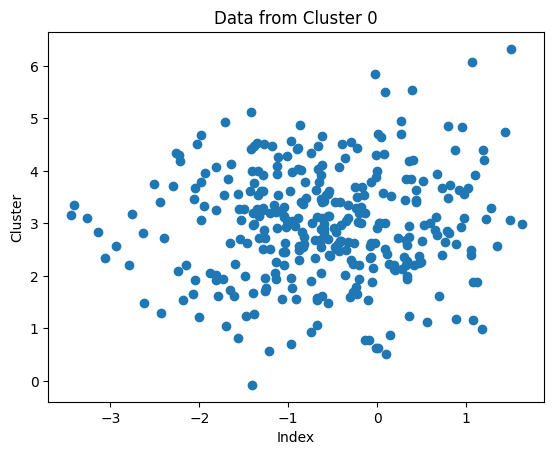

In [144]:
df_cluster_0 = df[df['Cluster'] == 0]
plt.plot(df_cluster_0['x'], df_cluster_0['y'], 'o')
plt.xlabel('Index')
plt.ylabel('Cluster')
plt.title('Data from Cluster 0')
plt.show()

In [145]:
df_cluster_1 = df[df['Cluster'] == 1]
df_cluster_2 = df[df['Cluster'] == 2]